数据分析案例---房价预测
一.数据分析的步骤
    1.数据获取
        爬取，监测，埋点，填写，日志，计算等等
    2.单因子探索分析与数据可视化
        数据分布--偏态（平均值和众数），峰度（数据发布）
        数据分类
        异常值分析
        对比分析
        结构分析
        分布分析
    3.多因子探索分析
        卡方检验
        方差检验
        主成分分析
        相关系数--Pearson
        分组分析
        相关分析
        因子分析
    4.数据预处理
        特征工程处理 -- 缺失值，异常值处理；特征变换：离散化，归一化，标准化，数值化，
                        对值化，分组化，正规化等等；特征选择：lDA降维，PCA降维，算法选择
                        特征衍生
        标注 ---- 对于要预测的值 》  方法和上面基本一致
    5.挖掘建模
        数据层次：训练集，验证集，测试集
        模型层次：分类：knn,贝叶斯，决策树，支持向量机，随机森林（集成学习）
                  adaboost（集成）,xgboost(集成)。。。。
                  回归：线性回归，逻辑回归，回归树与提升树
                  聚类:kmeans，Dbscan，层次聚类，图分裂
             深度学习：人工神经网络，卷积神经网络。。              
    6.模型评估
        分类评估：ROC，AUC，提升图，ks图
        回归评估

In [29]:
#导入相关库
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
#读入数据并且显示前10条
train_data = pd.read_csv(r'D:\Dc floor\train.csv')
test_data = pd.read_csv(r'D:\Dc floor\test.csv')
train_data.head(10)

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509
5,1,1192,0.039062,2,0.309091,0.012579,南,NaN,2,1,1,NaN,3.0,143.0,3.0,59.0,0.495833,NaN,4.923599
6,1,1122,0.125000,0,0.381818,0.010593,南,NaN,3,1,1,NaN,11.0,48.0,2.0,9.0,0.193333,NaN,6.621392
7,1,1251,0.128906,2,0.363636,0.018040,南,NaN,4,2,2,NaN,12.0,52.0,NaN,NaN,NaN,NaN,14.091681
8,1,4718,0.246094,2,0.309091,0.007850,西南,NaN,1,1,1,NaN,3.0,143.0,NaN,NaN,NaN,NaN,4.584041
9,1,2654,0.218750,2,0.890909,0.020026,东南,NaN,2,1,2,NaN,10.0,43.0,4.0,58.0,0.400000,NaN,39.558574


In [31]:
#将列名变成英文
train_data.columns=['time','cell name','houses rent','floor','total floor','area','face','status','bedrooms','parlour','bathroom','rental mode','district','position','subway lines','subway station','long','renovation','price']
train_data.head()

,time,cell name,houses rent,floor,total floor,area,face,status,bedrooms,parlour,bathroom,rental mode,district,position,subway lines,subway station,long,renovation,price
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509


In [32]:
#查看数据的结构分布
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
time              196539 non-null int64
cell name         196539 non-null int64
houses rent       195538 non-null float64
floor             196539 non-null int64
total floor       196539 non-null float64
area              196539 non-null float64
face              196539 non-null object
status            20138 non-null float64
bedrooms          196539 non-null int64
parlour           196539 non-null int64
bathroom          196539 non-null int64
rental mode       24230 non-null float64
district          196508 non-null float64
position          196508 non-null float64
subway lines      91778 non-null float64
subway station    91778 non-null float64
long              91778 non-null float64
renovation        18492 non-null float64
price             196539 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 28.5+ MB


(196539, 19)

In [33]:
train_data.describe()

,time,cell name,houses rent,floor,total floor,area,status,bedrooms,parlour,bathroom,rental mode,district,position,subway lines,subway station,long,renovation,price
count,196539.000000,196539.000000,195538.000000,196539.000000,196539.000000,196539.000000,20138.000000,196539.000000,196539.000000,196539.000000,24230.000000,196508.000000,196508.000000,91778.000000,91778.000000,91778.000000,18492.000000,196539.000000
mean,2.115229,3224.116562,0.124151,0.955449,0.408711,0.013139,2.725196,2.236635,1.299625,1.223818,0.900289,7.905139,67.945982,3.284850,57.493735,0.551202,3.589228,7.949313
std,0.786980,2023.073726,0.133299,0.851511,0.183100,0.008104,0.667763,0.896961,0.613169,0.487234,0.299621,4.025696,43.522394,1.477147,35.191414,0.247268,1.996912,6.310609
min,1.000000,0.000000,0.007812,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001667,1.000000,0.000000
25%,1.000000,1388.000000,0.039062,0.000000,0.290909,0.009268,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,33.000000,2.000000,23.000000,0.356667,2.000000,4.923599
50%,2.000000,3086.000000,0.082031,1.000000,0.418182,0.012910,3.000000,2.000000,1.000000,1.000000,1.000000,9.000000,61.000000,4.000000,59.000000,0.554167,2.000000,6.621392
75%,3.000000,5199.000000,0.160156,2.000000,0.563636,0.014896,3.000000,3.000000,2.000000,1.000000,1.000000,11.000000,103.000000,5.000000,87.000000,0.745833,6.000000,8.998302
max,3.000000,6627.000000,1.000000,2.000000,1.000000,1.000000,3.000000,11.000000,8.000000,8.000000,1.000000,14.000000,152.000000,5.000000,119.000000,1.000000,6.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DB0C7B978>,
      dtype=object)

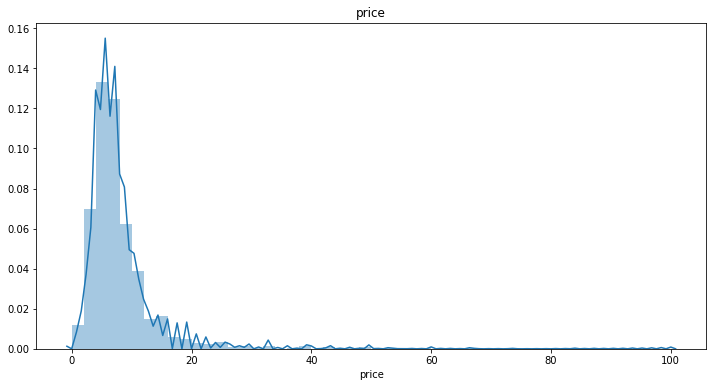

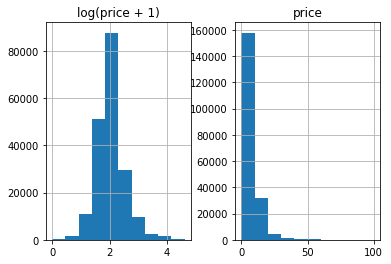

In [34]:
#绘制一个柱形图查看price的分布情况
plt.figure(figsize=(12,6))
#绘制一个价格的曲线
plt.title('price')
sns.distplot(train_data['price'])
prices = pd.DataFrame({"price":train_data["price"], "log(price + 1)":np.log1p(train_data["price"])})
prices.hist()

In [35]:
#将方向进行数值化
train_data['face']=train_data['face'].str.partition(' ').get(0)
title_Dict = {}
title_Dict.update(dict.fromkeys(['东'],'0'))
title_Dict.update(dict.fromkeys(['东北'],'1'))
title_Dict.update(dict.fromkeys(['北'],'2'))
title_Dict.update(dict.fromkeys(['西北'],'3'))
title_Dict.update(dict.fromkeys(['西'],'4'))
title_Dict.update(dict.fromkeys(['西南'],'5'))
title_Dict.update(dict.fromkeys(['南'],'6'))
title_Dict.update(dict.fromkeys(['东南'],'7'))

train_data['face'] = train_data['face'].map(title_Dict)
train_data['face']=train_data['face'].convert_objects(convert_numeric=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
time              196539 non-null int64
cell name         196539 non-null int64
houses rent       195538 non-null float64
floor             196539 non-null int64
total floor       196539 non-null float64
area              196539 non-null float64
face              196539 non-null int64
status            20138 non-null float64
bedrooms          196539 non-null int64
parlour           196539 non-null int64
bathroom          196539 non-null int64
rental mode       24230 non-null float64
district          196508 non-null float64
position          196508 non-null float64
subway lines      91778 non-null float64
subway station    91778 non-null float64
long              91778 non-null float64
renovation        18492 non-null float64
price             196539 non-null float64
dtypes: float64(12), int64(7)
memory usage: 28.5 MB


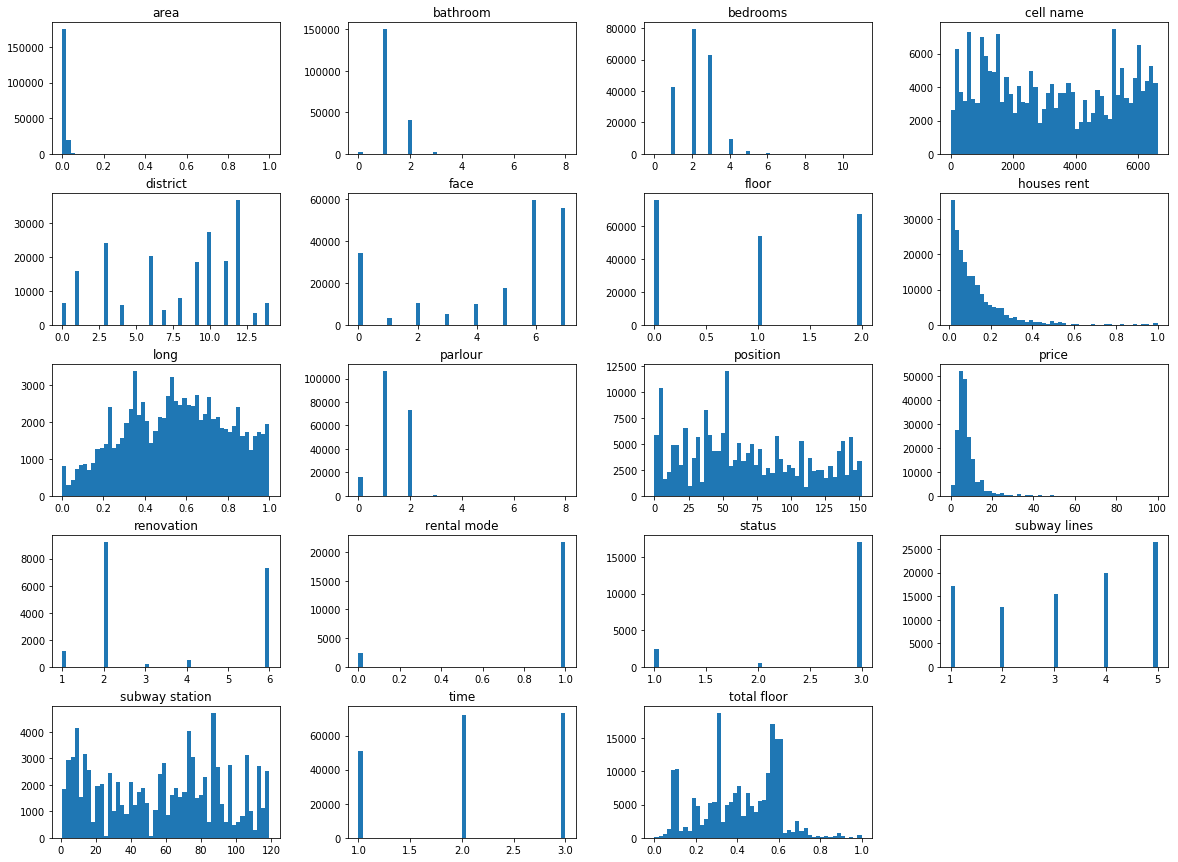

In [36]:
#查看一下所有的数据分布情况，结构特点
train_data.hist(figsize=(20,15),bins=50,grid=False)
plt.show()

In [37]:
#数据填充
#train_data['renovation']=train_data['renovation'].apply(lambda x:1 if x>0 else 0)
#train_data['status']=train_data['status'].apply(lambda x:1 if x>0 else 0)
train_data['status']=train_data['status'].fillna(0)
train_data['rental mode']=train_data['rental mode'].fillna(2)
train_data['renovation']=train_data['renovation'].fillna(0)
train_data.head(10)

,time,cell name,houses rent,floor,total floor,area,face,status,bedrooms,parlour,bathroom,rental mode,district,position,subway lines,subway station,long,renovation,price
0,1,3072,0.128906,2,0.236364,0.008628,7,0.0,1,1,1,2.0,11.0,118.0,2.0,40.0,0.764167,0.0,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,0,0.0,1,0,0,2.0,10.0,100.0,4.0,58.0,0.709167,0.0,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,7,0.0,2,1,2,2.0,12.0,130.0,5.0,37.0,0.572500,0.0,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,6,0.0,3,2,2,2.0,7.0,90.0,2.0,63.0,0.658333,0.0,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,1,0.0,2,1,1,2.0,3.0,31.0,NaN,NaN,NaN,0.0,7.300509
5,1,1192,0.039062,2,0.309091,0.012579,6,0.0,2,1,1,2.0,3.0,143.0,3.0,59.0,0.495833,0.0,4.923599
6,1,1122,0.125000,0,0.381818,0.010593,6,0.0,3,1,1,2.0,11.0,48.0,2.0,9.0,0.193333,0.0,6.621392
7,1,1251,0.128906,2,0.363636,0.018040,6,0.0,4,2,2,2.0,12.0,52.0,NaN,NaN,NaN,0.0,14.091681
8,1,4718,0.246094,2,0.309091,0.007850,5,0.0,1,1,1,2.0,3.0,143.0,NaN,NaN,NaN,0.0,4.584041
9,1,2654,0.218750,2,0.890909,0.020026,7,0.0,2,1,2,2.0,10.0,43.0,4.0,58.0,0.400000,0.0,39.558574


In [38]:
#再查看一下数据情况
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
time              196539 non-null int64
cell name         196539 non-null int64
houses rent       195538 non-null float64
floor             196539 non-null int64
total floor       196539 non-null float64
area              196539 non-null float64
face              196539 non-null int64
status            196539 non-null float64
bedrooms          196539 non-null int64
parlour           196539 non-null int64
bathroom          196539 non-null int64
rental mode       196539 non-null float64
district          196508 non-null float64
position          196508 non-null float64
subway lines      91778 non-null float64
subway station    91778 non-null float64
long              91778 non-null float64
renovation        196539 non-null float64
price             196539 non-null float64
dtypes: float64(12), int64(7)
memory usage: 28.5 MB


In [39]:
train_data['district']=train_data['district'].fillna(8.0)
district_mean_pos=train_data['position'].mean()
print(district_mean_pos)
train_data['position']=train_data['position'].fillna(district_mean_pos)
district_mean_hou=train_data['houses rent'].mean()
print(district_mean_hou)

67.9459818429784
0.12415104017505549


In [40]:
train_data['houses rent']=train_data['houses rent'].fillna(district_mean_hou)
train_data['subway lines']=train_data['subway lines'].fillna(0)
train_data['subway station']=train_data['subway station'].fillna(-1)
train_data['long']=train_data['long'].fillna(0)
#数据的缺失值填充完成

In [41]:
#再查看一下数据情况
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
time              196539 non-null int64
cell name         196539 non-null int64
houses rent       196539 non-null float64
floor             196539 non-null int64
total floor       196539 non-null float64
area              196539 non-null float64
face              196539 non-null int64
status            196539 non-null float64
bedrooms          196539 non-null int64
parlour           196539 non-null int64
bathroom          196539 non-null int64
rental mode       196539 non-null float64
district          196539 non-null float64
position          196539 non-null float64
subway lines      196539 non-null float64
subway station    196539 non-null float64
long              196539 non-null float64
renovation        196539 non-null float64
price             196539 non-null float64
dtypes: float64(12), int64(7)
memory usage: 28.5 MB


In [42]:
bin_ranges = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
bin_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_data['position_bin'] = pd.cut(np.array(train_data['position']),bins=bin_ranges,labels=bin_names)

sub_ranges = [-10,0,10,20,30,40,50,60,70,80,90,100,110,120]
sub_names = [1,2,3,4,5,6,7,8,9,10,11,12,13]
train_data['subway station_sub'] = pd.cut(np.array(train_data['subway station']),bins=sub_ranges,labels=sub_names)

nam_ranges = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
nam_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
train_data['cell name_sub'] = pd.cut(np.array(train_data['cell name']),bins=nam_ranges,labels=nam_names)

'''lo_ranges = [-1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,3.0]
lo_names = [1,2,3,4,5,6,7,8,9,10,11]
train_data['long_sub'] = pd.cut(np.array(train_data['long']),bins=lo_ranges,labels=lo_names)
train_data['long_sub']
par_ranges = [-1,0.9,1.9,2.9,20]
par_names = [1,2,3,4]
train_data['parlour_sub'] = pd.cut(np.array(train_data['parlour']),bins=par_ranges,labels=par_names)

bath_ranges = [-1,0.9,1.9,2.9,3.9,20]
bath_names = [1,2,3,4,5]
train_data['bathroom_sub'] = pd.cut(np.array(train_data['bathroom']),bins=bath_ranges,labels=bath_names)

,'bathroom_sub','bedrooms_bed'

bed_ranges = [-1,1.9,2.9,3.9,4.9,20]
bed_names = [1,2,3,4,5]
train_data['bedrooms_bed'] = pd.cut(np.array(train_data['bedrooms']),bins=bed_ranges,labels=bed_names)'''

"lo_ranges = [-1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,3.0]\nlo_names = [1,2,3,4,5,6,7,8,9,10,11]\ntrain_data['long_sub'] = pd.cut(np.array(train_data['long']),bins=lo_ranges,labels=lo_names)\ntrain_data['long_sub']\npar_ranges = [-1,0.9,1.9,2.9,20]\npar_names = [1,2,3,4]\ntrain_data['parlour_sub'] = pd.cut(np.array(train_data['parlour']),bins=par_ranges,labels=par_names)\n\nbath_ranges = [-1,0.9,1.9,2.9,3.9,20]\nbath_names = [1,2,3,4,5]\ntrain_data['bathroom_sub'] = pd.cut(np.array(train_data['bathroom']),bins=bath_ranges,labels=bath_names)\n\n,'bathroom_sub','bedrooms_bed'\n\nbed_ranges = [-1,1.9,2.9,3.9,4.9,20]\nbed_names = [1,2,3,4,5]\ntrain_data['bedrooms_bed'] = pd.cut(np.array(train_data['bedrooms']),bins=bed_ranges,labels=bed_names)"

In [43]:
#one-hot处理
ordinal_cols={'status','rental mode','floor','subway lines','renovation','face','position_bin','subway station_sub','cell name_sub'}
for col in ordinal_cols:
    dummies = pd.get_dummies(train_data[col],drop_first=False)
    dummies =dummies.add_prefix("{}#".format(col))
    #train_data.drop(col,axis=1,inplace=True)
    train_data=train_data.join(dummies)
train_data.head()

,time,cell name,houses rent,floor,total floor,area,face,status,bedrooms,parlour,...,face#5,face#6,face#7,status#0.0,status#1.0,status#2.0,status#3.0,floor#0,floor#1,floor#2
0,1,3072,0.128906,2,0.236364,0.008628,7,0.0,1,1,...,0,0,1,1,0,0,0,0,0,1
1,1,3152,0.132812,1,0.381818,0.017046,0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,5575,0.042969,0,0.290909,0.010593,7,0.0,2,1,...,0,0,1,1,0,0,0,1,0,0
3,1,3103,0.085938,2,0.581818,0.019199,6,0.0,3,2,...,0,1,0,1,0,0,0,0,0,1
4,1,5182,0.214844,0,0.545455,0.010427,1,0.0,2,1,...,0,0,0,1,0,0,0,1,0,0


In [44]:
#这里自建两个字段
train_data['type']=train_data['bedrooms']+train_data['parlour']+train_data['bathroom']
train_data['area_square']=train_data['area']*train_data['area']

#train_data['bed_par']=train_data['bedrooms']+train_data['parlour']
#train_data['bed_bath']=train_data['bedrooms']+train_data['bathroom']
#train_data['par_bath']=train_data['parlour']+train_data['bathroom']

In [45]:
#单个测试pearson 相关性
from scipy.stats import pointbiserialr
r,p = pointbiserialr(train_data['status'],train_data['price'])
print(r)

-0.036880330790458805


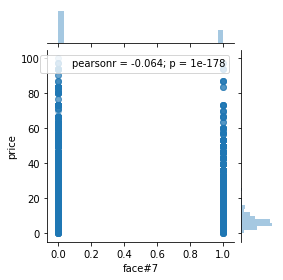

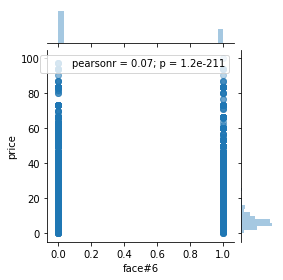

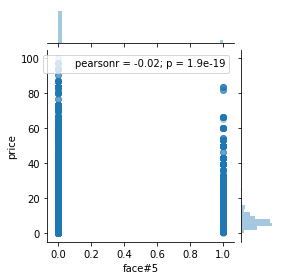

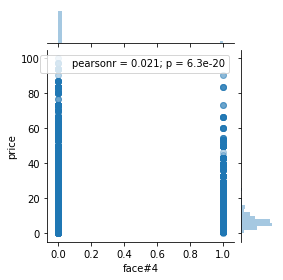

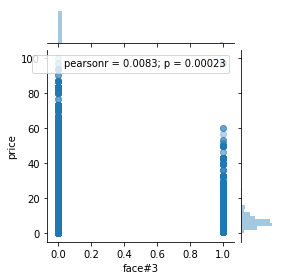

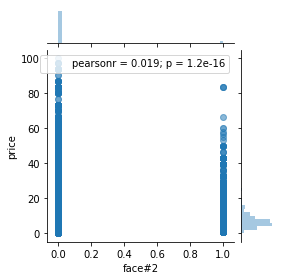

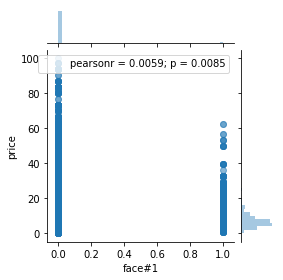

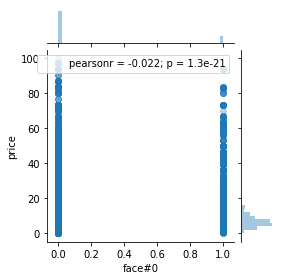

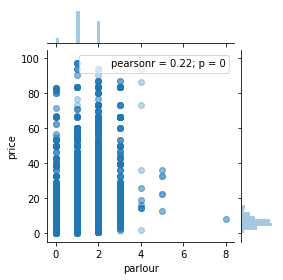

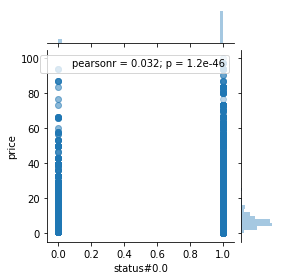

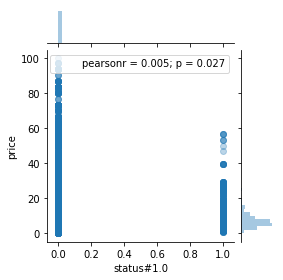

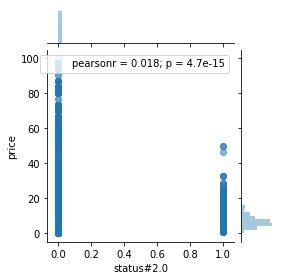

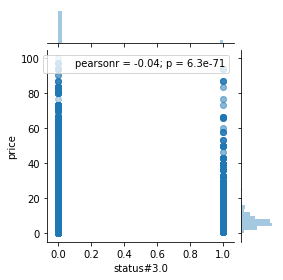

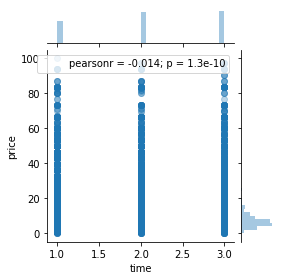

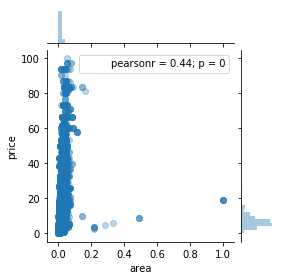

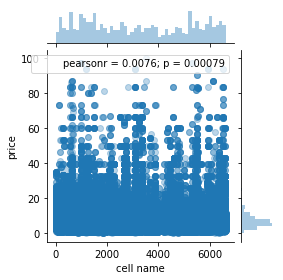

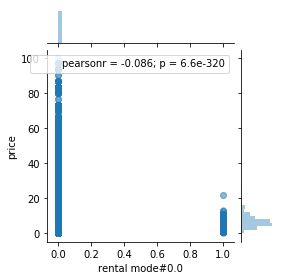

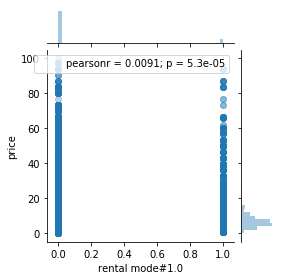

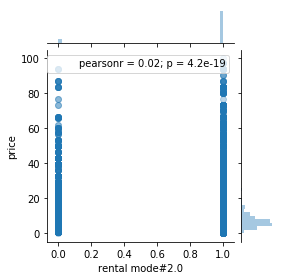

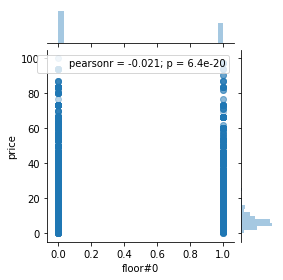

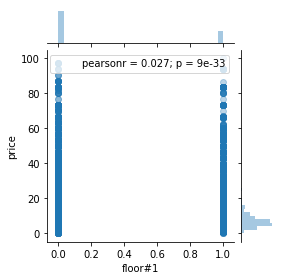

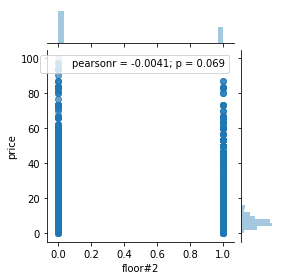

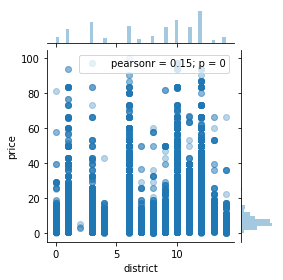

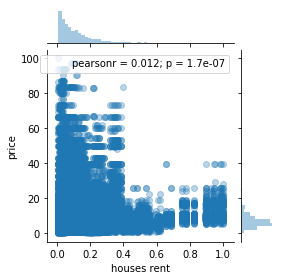

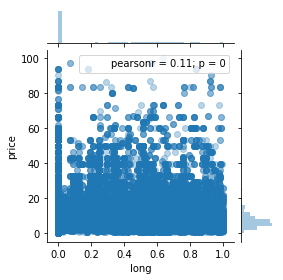

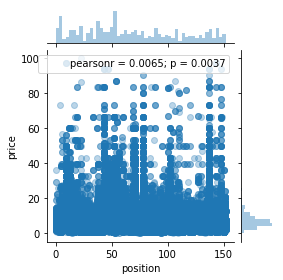

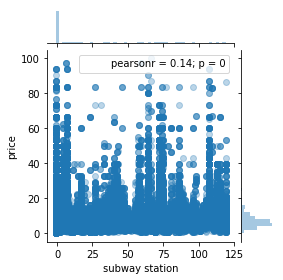

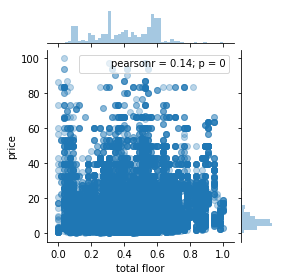

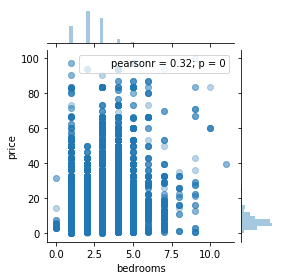

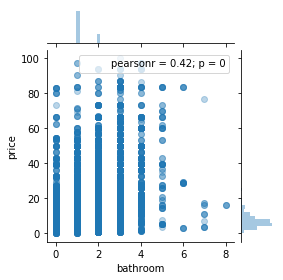

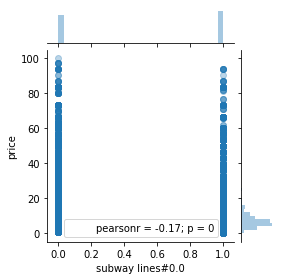

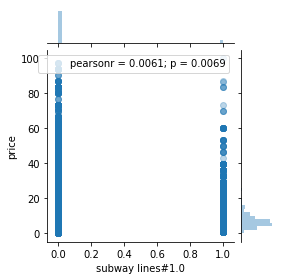

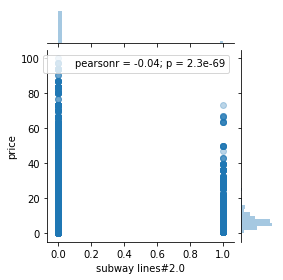

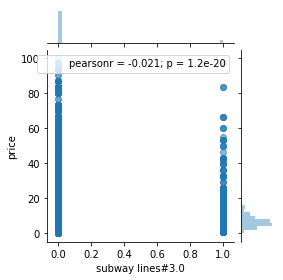

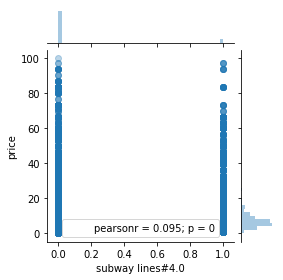

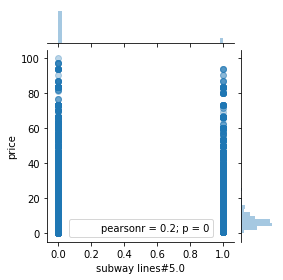

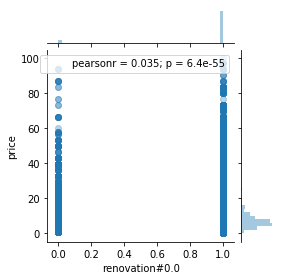

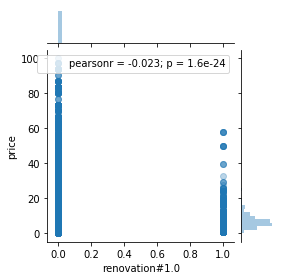

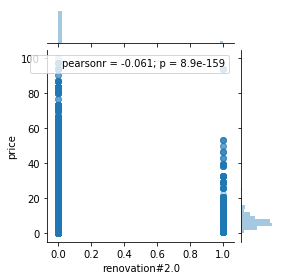

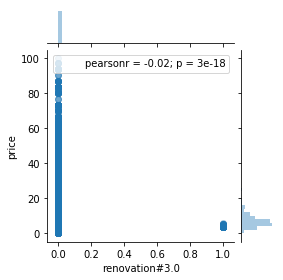

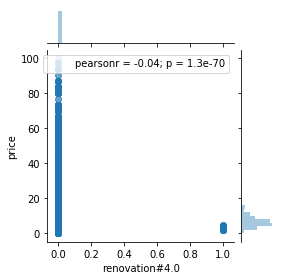

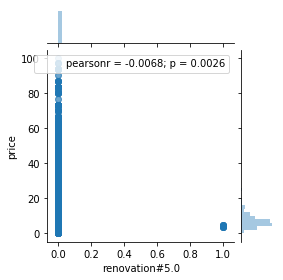

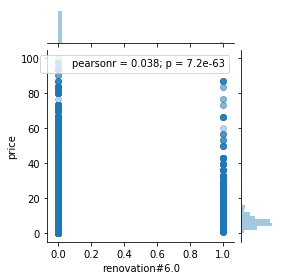

In [53]:
#continuous_cols = ['face#7','face#6','face#5','face#4','face#3','face#2','face#1','face#0','parlour','status#0.0','status#1.0','status#2.0','status#3.0','time','area','cell name','rental mode#0.0','rental mode#1.0','rental mode#2.0','floor#0','floor#1','floor#2','district','houses rent','long','position','subway station','total floor','bedrooms','bathroom','subway lines#0.0','subway lines#1.0','subway lines#2.0','subway lines#3.0','subway lines#4.0','subway lines#5.0','renovation#0.0','renovation#1.0','renovation#2.0','renovation#3.0','renovation#4.0','renovation#5.0','renovation#6.0']
#for col in continuous_cols:
#    sns.jointplot(x=col,y="price",data = train_data,alpha=0.3,size=4)

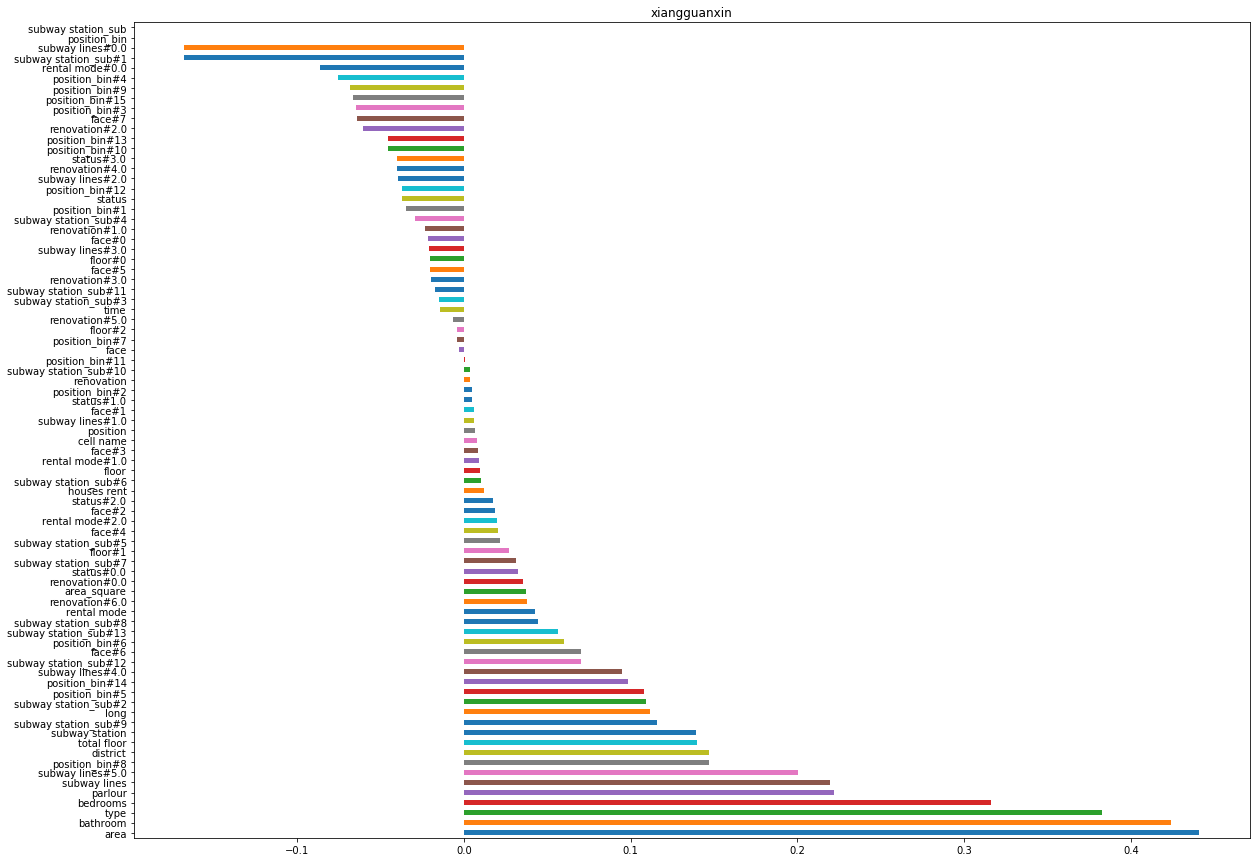

In [19]:
continuous_cols =['face','face#7','face#6','face#5','face#4','face#3','face#2','face#1','face#0','parlour','status','status#0.0','status#1.0','status#2.0','status#3.0','time','area','cell name','rental mode','rental mode#0.0','rental mode#1.0','rental mode#2.0','floor','floor#0','floor#1','floor#2','district','houses rent','long','position','subway station','total floor','bedrooms','bathroom','subway lines','subway lines#0.0','subway lines#1.0','subway lines#2.0','subway lines#3.0','subway lines#4.0','subway lines#5.0','renovation#0.0','renovation','renovation#1.0','renovation#2.0','renovation#3.0','renovation#4.0','renovation#5.0','renovation#6.0','type','area_square','position_bin','position_bin#1','position_bin#2','position_bin#3','position_bin#4','position_bin#5','position_bin#6','position_bin#7','position_bin#8','position_bin#9','position_bin#10','position_bin#11','position_bin#12','position_bin#13','position_bin#14','position_bin#15','subway station_sub','subway station_sub#1','subway station_sub#2','subway station_sub#3','subway station_sub#4','subway station_sub#5','subway station_sub#6','subway station_sub#7','subway station_sub#8','subway station_sub#9','subway station_sub#10','subway station_sub#11','subway station_sub#12','subway station_sub#13']
plt.figure(figsize=(75,50))
train_data.corr()['price'][continuous_cols].sort_values(ascending=False).plot('barh',figsize=(20,15),title='xiangguanxin')

In [58]:
#特征选择
from sklearn.ensemble import RandomForestRegressor
np.random.seed(21)
rf_reg=RandomForestRegressor(n_estimators=200,verbose=1)
rf_reg.fit(train_data_X,train_data_Y)
combine_lists = lambda item:[item[0],item[1]]
feature_importance = list(map(combine_lists,zip(train_data.columns,rf_reg.feature_importances_)))
#feature_importance = pd.DataFrame(feature_importance,columns='importance').sor['feature',t_values(by='importance',ascending=False)
feature_importance = pd.DataFrame(feature_importance,columns=['feature','importance']).sort_values(by='importance',ascending=False)
feature_importance.head(10)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


,feature,importance
2,houses rent,0.318285
7,status,0.150876
61,subway station_sub#8,0.106630
1,cell name,0.097873
8,bedrooms,0.063659
10,bathroom,0.031896
9,parlour,0.028969
11,rental mode,0.022959
60,subway station_sub#7,0.020009
4,total floor,0.018733


In [ ]:
#删除训练集中等于0大于90的记录
'''train_data[train_data['price']==0]['price'].index
index=train_data[train_data['price']==0]['price'].index
for a in index:
    train_data=train_data.drop(a,axis=0)
train_data.shape
index=train_data[train_data['price']>90]['price'].index
for a in index:
    train_data=train_data.drop(a,axis=0)
train_data.shape'''

In [46]:
train_data['price']=np.log1p(train_data['price'])
train_data_Y=train_data['price']
#特征选择
train_data=train_data.drop('price',axis=1)
train_data=train_data.drop('floor#2',axis=1)
train_data=train_data.drop('status#1.0',axis=1)
train_data=train_data.drop('face#1',axis=1)
train_data=train_data.drop('renovation#5.0',axis=1)
#train_data=train_data.drop('face#2',axis=1)
train_data=train_data.drop('face#3',axis=1)
train_data=train_data.drop('subway lines#1.0',axis=1)
 
train_data=train_data.drop('position_bin#7',axis=1)
train_data=train_data.drop('position_bin#11',axis=1)
train_data=train_data.drop('position_bin#2',axis=1)
train_data=train_data.drop('position_bin',axis=1)
train_data=train_data.drop('subway station_sub',axis=1)
train_data=train_data.drop('subway station_sub#10',axis=1)
#train_data=train_data.drop('long_sub',axis=1)
#train_data=train_data.drop('subway station',axis=1)
#train_data=train_data.drop('subway lines',axis=1)
#
#train_data=train_data.drop('parlour_sub',axis=1)
#train_data=train_data.drop('bathroom_sub',axis=1)
#train_data=train_data.drop('bathroom_sub#1',axis=1)
#train_data=train_data.drop('bedrooms_bed',axis=1)
                           
train_data=train_data.drop('face',axis=1)
train_data=train_data.drop('renovation',axis=1)
train_data=train_data.drop('rental mode',axis=1)

#train_data=train_data.drop('position',axis=1)
train_data=train_data.drop('rental mode#1.0',axis=1)
train_data=train_data.drop('houses rent',axis=1)
train_data=train_data.drop('time',axis=1)
train_data=train_data.drop('cell name_sub',axis=1)
train_data_X=train_data.drop('cell name',axis=1)
#train_data_Y=train_data['price']
train_data_X.head()

,floor,total floor,area,status,bedrooms,parlour,bathroom,district,position,subway lines,...,face#5,face#6,face#7,status#0.0,status#2.0,status#3.0,floor#0,floor#1,type,area_square
0,2,0.236364,0.008628,0.0,1,1,1,11.0,118.0,2.0,...,0,0,1,1,0,0,0,0,3,0.000074
1,1,0.381818,0.017046,0.0,1,0,0,10.0,100.0,4.0,...,0,0,0,1,0,0,0,1,1,0.000291
2,0,0.290909,0.010593,0.0,2,1,2,12.0,130.0,5.0,...,0,0,1,1,0,0,1,0,5,0.000112
3,2,0.581818,0.019199,0.0,3,2,2,7.0,90.0,2.0,...,0,1,0,1,0,0,0,0,7,0.000369
4,0,0.545455,0.010427,0.0,2,1,1,3.0,31.0,0.0,...,0,0,0,1,0,0,1,0,4,0.000109


In [47]:
#测试集处理
test_data.columns=['id','time','cell name','houses rent','floor','total floor','area','face','status','bedrooms','parlour','bathroom','rental mode','district','position','subway lines','subway station','long','renovation']
test_data['face']=test_data['face'].str.partition(' ').get(0)
title_Dict = {}
title_Dict.update(dict.fromkeys(['东'],'0'))
title_Dict.update(dict.fromkeys(['东北'],'1'))
title_Dict.update(dict.fromkeys(['北'],'2'))
title_Dict.update(dict.fromkeys(['西北'],'3'))
title_Dict.update(dict.fromkeys(['西'],'4'))
title_Dict.update(dict.fromkeys(['西南'],'5'))
title_Dict.update(dict.fromkeys(['南'],'6'))
title_Dict.update(dict.fromkeys(['东南'],'7'))
 
test_data['face'] = test_data['face'].map(title_Dict)
test_data['face']=test_data['face'].convert_objects(convert_numeric=True)
 
test_data['status']=test_data['status'].fillna(0)
test_data['rental mode']=test_data['rental mode'].fillna(2)
test_data['renovation']=test_data['renovation'].fillna(0)
 
 
district_mean_dis=test_data['district'].mean()
print(district_mean_dis)
test_data['district']=test_data['district'].fillna(8.0)
 
district_mean_pos=test_data['position'].mean()
print(district_mean_pos)
test_data['position']=test_data['position'].fillna(district_mean_pos)
 
district_mean_hou=test_data['houses rent'].mean()
print(district_mean_hou)
test_data['houses rent']=test_data['houses rent'].fillna(district_mean_hou)
 
test_data['subway lines']=test_data['subway lines'].fillna(0)
test_data['subway station']=test_data['subway station'].fillna(-1)
test_data['long']=test_data['long'].fillna(0)
test_data.isnull().sum().sort_values(ascending=False).head(10)
bin_ranges = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
bin_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
test_data['position_bin'] = pd.cut(np.array(test_data['position']),bins=bin_ranges,labels=bin_names)

sub_ranges = [-10,0,10,20,30,40,50,60,70,80,90,100,110,120]
sub_names = [1,2,3,4,5,6,7,8,9,10,11,12,13]
test_data['subway station_sub'] = pd.cut(np.array(test_data['subway station']),bins=sub_ranges,labels=sub_names)

nam_ranges = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
nam_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
test_data['cell name_sub'] = pd.cut(np.array(test_data['cell name']),bins=nam_ranges,labels=nam_names)

'''par_ranges = [-1,0.9,1.9,2.9,20]
par_names = [1,2,3,4]
test_data['parlour_sub'] = pd.cut(np.array(test_data['parlour']),bins=par_ranges,labels=par_names)

bath_ranges = [-1,0.9,1.9,2.9,3.9,20]
bath_names = [1,2,3,4,5]
test_data['bathroom_sub'] = pd.cut(np.array(test_data['bathroom']),bins=bath_ranges,labels=bath_names)

bed_ranges = [-1,1.9,2.9,3.9,4.9,20]
bed_names = [1,2,3,4,5]
test_data['bedrooms_bed'] = pd.cut(np.array(test_data['bedrooms']),bins=bed_ranges,labels=bed_names)

# ,'bathroom_sub','bedrooms_bed'
lo_ranges = [-1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,3.0]
lo_names = [1,2,3,4,5,6,7,8,9,10,11]
test_data['long_sub'] = pd.cut(np.array(test_data['long']),bins=lo_ranges,labels=lo_names)
#train_data['long_sub']'''
ordinal_col={'status','rental mode','floor','subway lines','renovation','face','position_bin','subway station_sub','cell name_sub'}
for col in ordinal_col:
    dummies = pd.get_dummies(test_data[col],drop_first=False)
    dummies =dummies.add_prefix("{}#".format(col))
    #test_data.drop(col,axis=1,inplace=True)
    test_data=test_data.join(dummies)
test_data['type']=test_data['bedrooms']+test_data['parlour']+test_data['bathroom']
test_data['area_square']=test_data['area']*test_data['area']

8.04298992340365
69.04073290799552
0.11947943700339514


In [22]:
test_data_id = test_data['id']
test_data_id.head()
#特征选择
test_data=test_data.drop('id',axis=1)
test_data=test_data.drop('floor#2',axis=1)
test_data=test_data.drop('status#1.0',axis=1)
test_data=test_data.drop('face#1',axis=1)
test_data=test_data.drop('renovation#5.0',axis=1)
#test_data=test_data.drop('face#2',axis=1)
test_data=test_data.drop('face#3',axis=1)
test_data=test_data.drop('subway lines#1.0',axis=1)
 
test_data=test_data.drop('position_bin#7',axis=1)
test_data=test_data.drop('position_bin#11',axis=1)
test_data=test_data.drop('position_bin#2',axis=1)
test_data=test_data.drop('position_bin',axis=1)
test_data=test_data.drop('subway station_sub',axis=1)
test_data=test_data.drop('subway station_sub#10',axis=1)

#test_data=test_data.drop('subway station',axis=1)
#test_data=test_data.drop('subway lines',axis=1)
#test_data=test_data.drop('long_sub',axis=1)
#test_data=test_data.drop('long_sub#10',axis=1)

#test_data=test_data.drop('parlour_sub',axis=1)
#test_data=test_data.drop('bathroom_sub',axis=1)
#test_data=test_data.drop('bathroom_sub#1',axis=1)
#test_data=test_data.drop('bedrooms_bed',axis=1)

test_data=test_data.drop('face',axis=1)
test_data=test_data.drop('renovation',axis=1)
test_data=test_data.drop('rental mode',axis=1)
 
#test_data=test_data.drop('status#2.0',axis=1)
test_data=test_data.drop('rental mode#1.0',axis=1)
test_data=test_data.drop('houses rent',axis=1)
#test_data=test_data.drop('position',axis=1)
test_data=test_data.drop('time',axis=1)
test_data=test_data.drop('cell name_sub',axis=1)
test_data=test_data.drop('cell name',axis=1)
test_data.head()

,floor,total floor,area,status,bedrooms,parlour,bathroom,district,position,subway lines,...,face#5,face#6,face#7,status#0.0,status#2.0,status#3.0,floor#0,floor#1,type,area_square
0,1,0.600000,0.007117,3.0,2,1,1,10.0,5.0,0.0,...,0,0,0,0,0,1,0,1,4,0.000051
1,1,0.472727,0.007448,0.0,2,1,1,3.0,0.0,0.0,...,0,0,0,1,0,0,0,1,4,0.000055
2,2,0.709091,0.014068,0.0,3,2,2,10.0,9.0,4.0,...,0,0,1,1,0,0,0,0,7,0.000198
3,0,0.090909,0.008937,0.0,2,1,1,6.0,96.0,5.0,...,0,1,0,1,0,0,1,0,4,0.000080
4,1,0.218182,0.008606,0.0,2,1,1,6.0,61.0,3.0,...,0,0,1,1,0,0,0,1,4,0.000074


In [48]:
#建立验证集
x_train_val=train_data_X[:20000]
x_train_val.head()
y_train_val=train_data_Y[:20000]
y_train=np.expm1(y_train_val)
y_train.head()

0     5.602716
1    16.977929
2     8.998302
3     5.602716
4     7.300509
Name: price, dtype: float64

In [49]:
#定义一个rmse评价函数
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [27]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
ran= RandomForestRegressor(n_estimators=200, max_features=0.3)
clf = XGBRegressor(max_depth=70,n_estimators=200,base_estimator=ran)
clf.fit(train_data_X,train_data_Y)
y_rfxgb = np.expm1(clf.predict(x_train_val))
#自定义评价rmse
rmse=(sum(pow((y_rfxgb-y_train),2))/20000)**0.5
print(rmse) 

0.6203804289169728


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from  sklearn.model_selection  import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
models = [XGBRegressor(max_depth=70,n_estimators=200),LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]

In [24]:
#定义要训练的算法模型
#"lr","ridge","Ker","Extra","xgb","rf"
names = ["xgb","lr"]
for name, model in zip(names, models): 
    score = rmse_cv(model, train_data_X, train_data_Y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

xgb: 0.114078, 0.0200
lr: 0.345241, 0.0053


In [65]:
#参数调节函数 GridSearchCV 网格式
class grid():
    def __init__(self,model):
        self.model = model
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [66]:
#lasso最优参数
grid(Lasso()).grid_get(train_data_X, train_data_Y,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0004, 'max_iter': 10000} 0.3723412101215861
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.372341        0.002224
1  {'alpha': 0.0005, 'max_iter': 10000}         0.375178        0.002282
2  {'alpha': 0.0007, 'max_iter': 10000}         0.377737        0.002273
3  {'alpha': 0.0006, 'max_iter': 10000}         0.377511        0.002257
4  {'alpha': 0.0009, 'max_iter': 10000}         0.378229        0.002304
5  {'alpha': 0.0008, 'max_iter': 10000}         0.377975        0.002286


In [ ]:
#XGB最优参数
grid(XGBRegressor()).grid_get(train_data_X, train_data_Y,{'max_depth':[30,50,70,100],'n_estimators':[100,200,500]})

In [ ]:
#定义学习曲线
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
max_features = [0.1,0.3,0.5,0.7,0.9]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, train_data_X, train_data_Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
params = [30,50,100]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param,n_estimators=200)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error")

In [ ]:
#最终的模型并且训练模型
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
ran= RandomForestRegressor(n_estimators=200, max_features=0.5)
clf = XGBRegressor(max_depth=30,n_estimators=200,base_estimator=ran)
clf.fit(train_data_X,train_data_Y)
y_rf = np.expm1(clf.predict(test_data))

In [ ]:
#保存预测结果
submission_df = pd.DataFrame(data= {'id': test_data_id, 'price': y_rf})
submission_df.to_csv(r'D:\king\xgboost1.csv',index=False,sep=',')